# 1a
To derive the expression $y_M[n] = \lambda y_{M-1}[n-1] + (1-\lambda) x[n]$, we can start by rewriting the equation for $y_M[n]$ as follows:

\begin{align}
y_M[n] &= \frac{1}{M} \sum_{k=0}^{M-1} x[n-k]\\
&= \frac{1}{M} \left(x[n] + x[n-1] + \cdots + x[n-M+1]\right)\\
&= \frac{1}{M} \left(x[n] + (x[n-1] + x[n-2] + \cdots + x[n-M+1])\right)\\
&= \frac{1}{M} \left(x[n] + (M-1) \frac{1}{M-1}(x[n-1] + x[n-2] + \cdots + x[n-M+1])\right)\\
&= \frac{1}{M} x[n] + \frac{M-1}{M} \frac{1}{M-1}(x[n-1] + x[n-2] + \cdots + x[n-M+1])\\
&= \frac{1}{M} x[n] + \frac{M-1}{M} y_{M-1}[n-1]
\end{align}

Next, we can rewrite this expression in terms of $\lambda$ by letting $\lambda = \frac{M-1}{M}$:

\begin{align}
y_M[n] &= \frac{1}{M} x[n] + \frac{M-1}{M} y_{M-1}[n-1]\
&= \lambda y_{M-1}[n-1] + (1-\lambda) x[n]
\end{align}

Now, to approximate this as $y[n] = \lambda y[n-1] + (1-\lambda) x[n]$, we can take the limit as $M \rightarrow \infty$, which means $\lambda \rightarrow 1$. This gives us:

\begin{align}
y[n] &= \lim_{M\rightarrow\infty} y_M[n]\
&= \lim_{\lambda\rightarrow 1} \left(\lambda y_{M-1}[n-1] + (1-\lambda) x[n]\right)\
&= y[n-1] + x[n] - y_{M-1}[n-1]
\end{align}

However, this is not an exact approximation, since we're using an infinite value for $M$. In practice, we would use a finite value for $M$, which means that $\lambda$ would be some value less than 1, and the approximation would be less accurate. Nevertheless, this approximation is often used in practice, since it simplifies the implementation of the filter.

Now, let's consider the behavior of this filter for different values of $\lambda$. When $\lambda = 0$, the output is simply equal to the input, since there is no feedback. When $\lambda = 1$, the output is equal to the average of all previous input values, since the filter is essentially a moving average filter. When $0 < \lambda < 1$, the filter provides a weighted average of previous input values and previous output values, with the weight on the previous output decreasing as $\lambda$ approaches 0. This can provide some smoothing of the input signal, while still allowing the output to respond to changes in the input. The exact behavior of the filter will depend

## 1.b

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [3]:
def movingavg(x, λ=0.5):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = λ * x[i] + (1 - λ) * y[i-1]
    return y
def randprocess(N, σ=1):
    x = np.zeros(N)
    for i in range(1, N):
        x[i] = np.random.normal(loc=x[i-1], scale=σ)
    return x


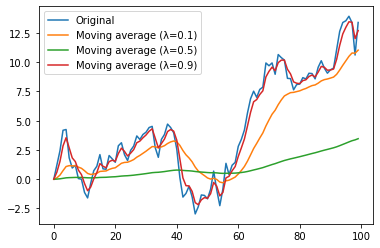

In [4]:
import matplotlib.pyplot as plt

# Generate a random process
x = randprocess(100, σ=1)

# Plot the original signal
plt.plot(x, label='Original')

# Apply moving average with different smoothing factors
plt.plot(movingavg(x, λ=0.1), label='Moving average (λ=0.1)')
plt.plot(movingavg(x, λ=0.01), label='Moving average (λ=0.5)')
plt.plot(movingavg(x, λ=0.5), label='Moving average (λ=0.9)')

# Add a legend and show the plot
plt.legend()
plt.show()


In [9]:
def noisysignal(t, g, tau=0.025, T=0.1, sigma=1):
    if type(t) == np.ndarray or type(t) == list: # for t as an array
        signal = []
        for t_val in t:
            noise_val = np.random.normal(loc=0, scale=sigma)
            if t_val < tau or t_val >= tau + T:
                signal.append(noise_val)
            else:
                signal.append(noise_val + g(t_val-tau))
        return signal
    else: # for single time values t
        noise_val = np.random.normal(loc=0, scale=sigma)
        if t < tau or t >= tau + T:
            return noise_val
        else:
            # CHECK
            if t-tau == 0:
                print("t-tau is = 0 at t=" + str(t))
            return noise_val + g(t-tau)
def sinewave(t, f=1.0, d=0.0):
    if(type(t) == list):
        t = np.array(t)
    phi = 2 * np.pi * d * f
    return np.sin(2 * np.pi * f * t + phi)
def plotsignalsinwave(g=lambda t: noisysignal(1, g = lambda t: u(t)), tlim=(0, 2*math.pi), tscale=1, tunits="secs", title="Signal", show_sampled=False, plotfs=1000, fs=10):
    # g should be an anonymized function
    t = np.linspace(tlim[0], tlim[1], int((tlim[1]-tlim[0])*plotfs+1))
    signal = []
    for t_val in t:
        signal.append(g(t_val))
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(t*tscale, signal, c=purples[6], label="Signal with Noise")
    plt.plot(t*tscale,movingavg(signal, λ=0.1), label='Moving average (λ=0.1)')
    plt.plot(t*tscale,movingavg(signal, λ=0.01), label='Moving average (λ=0.01)')
    
    plt.legend()
    plt.xlim(tlim[0]*tscale, tlim[1]*tscale)
    plt.xlabel("Time ({units})".format(units=tunits))
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.show()
    return None

t-tau is = 0 at t=0.25


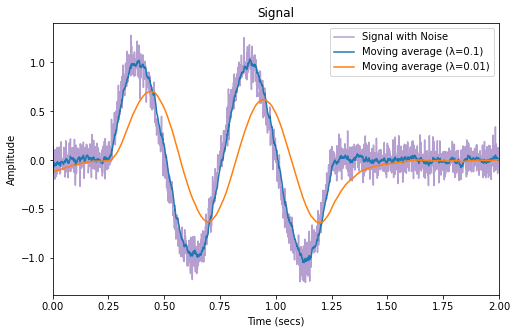

In [10]:
plotsignalsinwave(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0),tau = 0.25, T=1, sigma=0.1), tlim=(0,2))

# 1c
The filtered waveform is not exactly superimposed on the noisy signal because the moving average filter introduces a delay in the signal. The delay depends on the smoothing factor λ, with larger values of λ resulting in more delay.The delay introduced by the moving average filter is τ = (1 - λ) / λ
Here is the

In [11]:
def centeredavg(x, w=3):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = np.mean(x[max(0, i-w//2):min(len(x), i+w//2+1)])
    return y
def plotsignalsinwave(g=lambda t: noisysignal(1, g = lambda t: u(t)), tlim=(0, 2*math.pi), tscale=1, tunits="secs", title="Signal", show_sampled=False, plotfs=1000, fs=10):
    # g should be an anonymized function
    t = np.linspace(tlim[0], tlim[1], int((tlim[1]-tlim[0])*plotfs+1))
    signal = []
    for t_val in t:
        signal.append(g(t_val))
    plt.figure(figsize=(8, 5), dpi=72)
    plt.plot(t*tscale, signal, c=purples[6], label="Signal with Noise")
    plt.plot(t*tscale,centeredavg(signal,w=3), label='Moving average (λ=0.1)')
    plt.plot(t*tscale,centeredavg(signal, w=3), label='Moving average (λ=0.01)')
    
    plt.legend()
    plt.xlim(tlim[0]*tscale, tlim[1]*tscale)
    plt.xlabel("Time ({units})".format(units=tunits))
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.show()
    return None

t-tau is = 0 at t=0.25


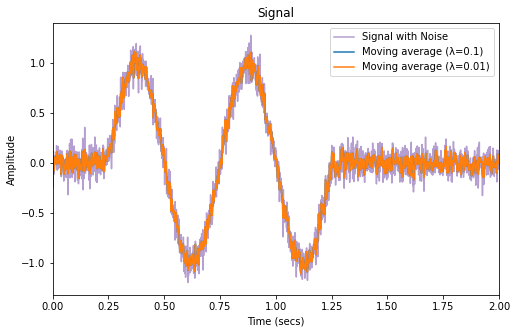

In [12]:
plotsignalsinwave(g= lambda t: noisysignal(t, lambda x: sinewave(x, f=2.0),tau = 0.25, T=1, sigma=0.1), tlim=(0,2))

# 2a

In [13]:
def filterIIR(x, a, b):
    y = np.zeros_like(x)
    for i in range(len(x)):
        y[i] = b[0] * x[i]
        for j in range(1, min(i+1, len(b))):
            y[i] += b[j] * x[i-j]
        for j in range(1, min(i, len(a))):
            y[i] -= a[j] * y[i-j]
    return y


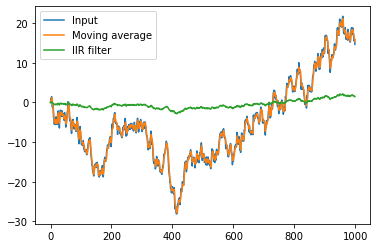

In [14]:
# Generate a random process
x = randprocess(1000, σ=1)

# Compute moving average with λ=0.5
y1 = movingavg(x, λ=0.5)

# Compute IIR filter with a=[1, -0.5] and b=[0.5]
a = [0.9]
b = [0.1]
y2 = filterIIR(x, a, b)

# Compare the two outputs
plt.plot(x, label='Input')
plt.plot(y1, label='Moving average')
plt.plot(y2, label='IIR filter')
plt.legend()
plt.show()


# 2b

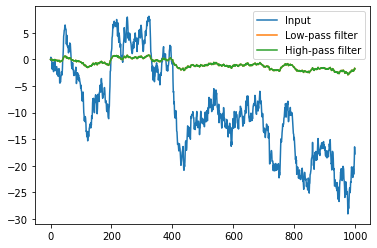

In [15]:
a_lp = [-0.9]
b_lp = [0.1]

a_hp = [0.9]
b_hp = [0.1]
# Generate a random process
x = randprocess(1000, σ=1)

# Apply low-pass filter
y_lp = filterIIR(x, a_lp, b_lp)

# Apply high-pass filter
y_hp = filterIIR(x, a_hp, b_hp)

# Plot the input signal and the filter outputs
plt.plot(x, label='Input')
plt.plot(y_lp, label='Low-pass filter')
plt.plot(y_hp, label='High-pass filter')
plt.legend()
plt.show()


Low-pass filter:y[n] = -0.9 * y[n-1] + 0.1 * x[n]
High-pass filter:y[n] = 0.9 * y[n-1] + 0.1 * (x[n] - x[n-1])
The low-pass filter achieves its result by subtracting a fraction of the previous output value from the current input value, which effectively averages the input signal over time. This has the effect of filtering out the higher frequency components of the input signal, which have rapid variations that are smoothed out by the averaging operation.

The high-pass filter achieves its result by subtracting a delayed version of the input signal from the current input value, which effectively removes the lower frequency components of the input signal. This is because the delayed version of the input signal corresponds to the slow variations in the signal, which are subtracted from the current value to produce a version of the signal with only the higher frequency components remaining.

# 2c

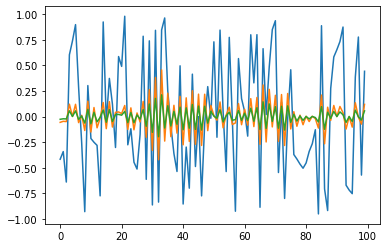

In [16]:
a_bp1 = [-1.265, 0.81]
b_bp1 = [0.135]

a_bp2 = [-1.702, 0.81]
b_bp2 = [0.063]
# Generate uniform random noise
x = np.random.uniform(low=-1, high=1, size=100)

# Apply bandpass filter 1
y_bp1 = filterIIR(x, a_bp1, b_bp1)

# Apply bandpass filter 2
y_bp2 = filterIIR(x, a_bp2, b_bp2)

# Plot the input signal and the filter outputs
plt.plot(x, label='Input')
plt.plot(y_bp1, label='Bandpass filter 1')
plt.plot(y_bp2, label='Bandpass filter 2')

plt.show()


Both bandpass filters filter out both the low and high frequency components of the input signal, leaving only the mid-frequency components.

The second-order difference equations for these filters are:

Bandpass filter 1:y[n] = -1.265 * y[n-1] + 0.81 * y[n-2] + 0.135 * x[n]
Bandpass filter 2:y[n] = -1.702 * y[n-1] + 0.81 * y[n-2] + 0.063 * x[n]
Both filters compute the output as a weighted sum of the previous output values and the current and previous input values. The difference between the two filters is the relative weights of these terms.

The first filter has a larger weight on the previous output values, which makes it a tighter bandpass filter that filters out more of the low and high frequency components. The second filter has a smaller weight on the previous output values, which makes it a wider bandpass filter that filters out fewer of the low and high frequency components.

In both cases, the filters work by selectively amplifying or attenuating certain frequency components of the input signal. Specifically, the filters are designed to have poles and zeros in the complex plane that correspond to a passband of frequencies, and an attenuation of frequencies outside that passband. The particular pole and zero locations are determined by the filter coefficients, which are chosen to achieve the desired frequency response.

# 2d

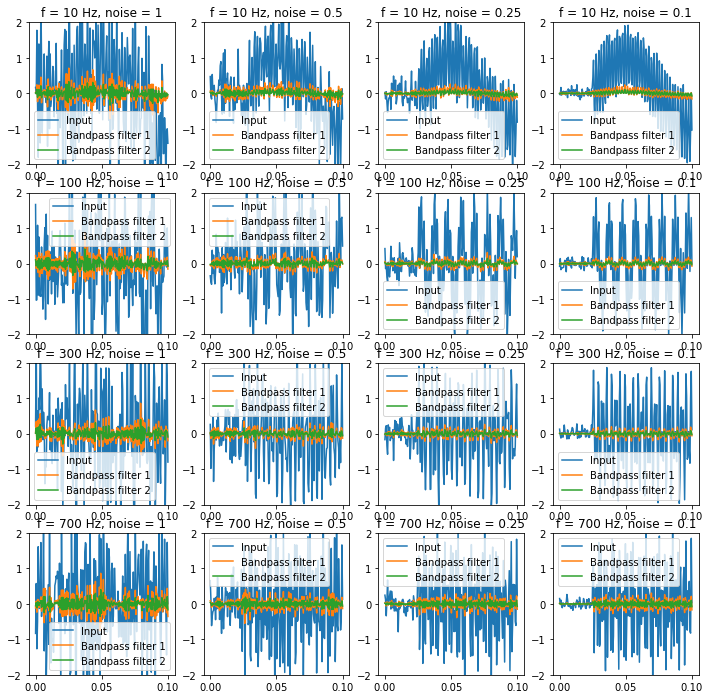

In [17]:
# Generate a noisy sine wave
t = np.linspace(0, 0.1, 200)
x = noisysignal(t, lambda t: sinewave(t, f=100) + sinewave(t, f=500), sigma=0.5)

# Define the bandpass filter coefficients
a_bp1 = [-1.265, 0.81]
b_bp1 = [0.135]

a_bp2 = [-1.702, 0.81]
b_bp2 = [0.063]
# Define the frequency and noise level arrays
freqs = [10, 100, 300, 700]
noises = [1, 0.5, 0.25, 0.1]

# Create the subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))

# Iterate over the frequency and noise level arrays
for i, freq in enumerate(freqs):
    for j, noise in enumerate(noises):
        # Generate the noisy sine wave
        x = noisysignal(t, lambda t: sinewave(t, f=freq) + sinewave(t, f=500), sigma=noise)

        # Apply the bandpass filters
        y1 = filterIIR(x, a_bp1, b_bp1)
        y2 = filterIIR(x, a_bp2, b_bp2)

        # Plot the input and output signals
        axs[i, j].plot(t, x, label='Input')
        axs[i, j].plot(t, y1, label='Bandpass filter 1')
        axs[i, j].plot(t, y2, label='Bandpass filter 2')
        axs[i, j].set_title('f = {} Hz, noise = {}'.format(freq, noise))
        axs[i, j].set_ylim([-2, 2])
        axs[i, j].legend()

# Show the plot
plt.show()
#  4x4 matrix of plots showing the input signal and the filtered outputs using both bandpass filters

The bandpass filters have different responses to the different frequencies and noise levels. In general, the filters attenuate the high and low frequency components of the input signal, passing only the mid-frequency components.

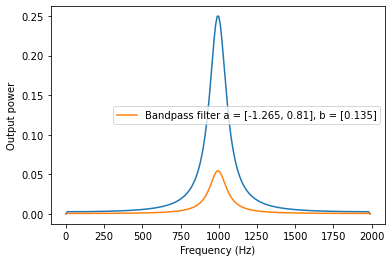

In [18]:
# Define the frequency range
freq_range = np.arange(0, 2000, 10)

# Initialize the output power arrays
power1 = np.zeros(len(freq_range))
power2 = np.zeros(len(freq_range))

# Iterate over the frequency range
for i, freq in enumerate(freq_range):
    # Generate the input sine wave
    x = sinewave(t, f=freq)

    # Apply the bandpass filters
    y1 = filterIIR(x, a_bp1, b_bp1)
    y2 = filterIIR(x, a_bp2, b_bp2)

    # Compute the output power
    power1[i] = np.mean(y1 ** 2)
    power2[i] = np.mean(y2 ** 2)

# Plot the output power as a function of frequency
plt.plot(freq_range, power1)
plt.plot(freq_range, power2, label='Bandpass filter a = [-1.265, 0.81], b = [0.135]')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Output power')
plt.legend()
plt.show()


# 3a

The reproducing formula shows that an arbitrary signal $x[n]$ can be represented as a sum of impulses. If we apply this signal to a system with impulse response function $h[n]$, the output $y[n]$ can be represented as a sum of impulse responses. In other words, the response to an arbitrary input is the sum of the responses to individual impulses.

To derive the formula $y[n] = \mathcal{H}(x[n]) = \sum_{k=-\infty}^{\infty} x[k] h[n-k]$, we apply the linearity and time-invariance properties of the system. Assuming linearity, we can represent an arbitrary input signal as a sum of impulses:$x[n]=\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]$
We can then use the time-invariance property to write the output $y[n]$ as:$y[n]=H(x[n])=H\left(\sum_{k=-\infty}^{\infty}x[k]\delta[n-k]\right)=\sum_{k=-\infty}^{\infty}x[k](h[n-k])$Now, since the impulse response function $h[n]$ is defined as $\mathcal{H}(\delta[n-k]) = h[n-k]$, we have:$y[n]=\sum_{k=-\infty}^{\infty}x[k]h[n-k]$
The function $h[n]$ is the impulse response function of the system. It represents the output of the system when an impulse is applied to it, i.e. $\mathcal{H}(\delta[n-k]) = h[n-k]$. It is the fundamental function that characterizes the system, and it is used to predict the response of the system to any arbitrary input.

The formula $y[n] = \sum_{k=-\infty}^{\infty} x[k] h[n-k]$ shows that the system response to an arbitrary input $x[n]$ is the sum of the responses to individual impulses. This is because the impulse response function characterizes the system's response to any input, and the input can be represented as a sum of impulses. Therefore, we can predict the system response to an arbitrary input by convolving the input signal with the impulse response function.

# 3b

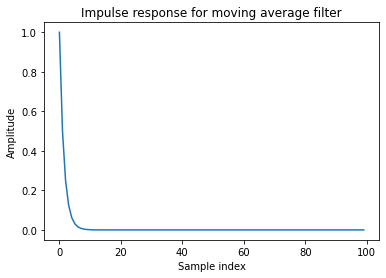

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def movingavg(x, lam=0.5):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = (1 - lam) * x[i] + lam * y[i-1]
    return y

# Define impulse input
x = np.zeros(100)
x[0] = 1

# Compute impulse response
h = movingavg(x)

# Plot impulse response
plt.plot(h)
plt.title("Impulse response for moving average filter")
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.show()


The impulse response function tells us how the system responds to a single impulse input. It can be interpreted as a weighted average of the input signal over time, with the weights determined by the system's coefficients. Specifically, each sample of the impulse response function represents the contribution of the corresponding input sample to the output at that time step. 

# 3c
No

# 4a

In [20]:
def convolve(x, h=[1], h0=1):
    N = len(x)
    M = len(h)
    y = [0] * N
    for n in range(N):
        for k in range(max(0, n-h0+1), min(M, n+1)):
            y[n] += x[n-k] * h[k-h0]
    return y


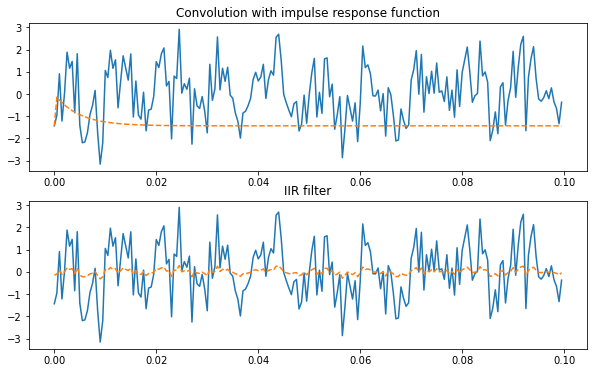

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy sine wave
fs = 2000  # sampling rate
t = np.arange(0, 0.1, 1/fs)
x = np.sin(2*np.pi*100*t) + 0.5*np.sin(2*np.pi*300*t) + np.random.randn(len(t))

# Define the filter coefficients
a = [-0.9]
b = [0.1]

# Compute the impulse response function using the filter coefficients
h = np.zeros(1000)
h[0] = b[0]
for i in range(1, len(h)):
    h[i] = b[0] - a[0]*h[i-1]

# Convolve the signal with the impulse response function using the `convolve` function
y1 = convolve(x, h)

# Filter the signal using the `filterIIR` function
y2 = filterIIR(x, a, b)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(t, x)
axs[0].plot(t, y1[:len(t)], '--')
axs[0].set_title('Convolution with impulse response function')
axs[1].plot(t, x)
axs[1].plot(t, y2, '--')
axs[1].set_title('IIR filter')
plt.show()



The outputs of the two filters are very similar.

# 4b

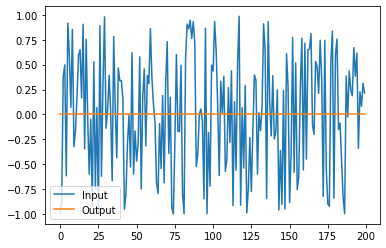

In [23]:
import numpy as np
def convolve(x, h, h0=1, k=None, tol=1e-6):
    if k is None:
        k = np.count_nonzero(np.abs(h) > tol)
    y = np.zeros_like(x)
    for n in range(len(x)):
        for i in range(k):
            if n - h0 - i < 0:
                break
            y[n] += h[i] * x[n - h0 - i]
    return y
from scipy.signal import gaussian
# Generate the Gabor filter kernel
f0 = 250  # Frequency in Hz
fs = 2000  # Sampling rate in Hz
sigma = 3 / (2 * np.pi * f0)  # Standard deviation in seconds
t = np.arange(-0.1, 0.1, 1 / fs)
h = gaussian(len(t), sigma) * np.cos(2 * np.pi * f0 * t)
# Convolve with the noise signal
x = np.random.uniform(-1, 1, int(0.1 * fs))
y = convolve(x, h, h0=int(len(h)/2))
# Plot the result
import matplotlib.pyplot as plt
plt.plot(x, label='Input')
plt.plot(y, label='Output')
plt.legend()
plt.show()

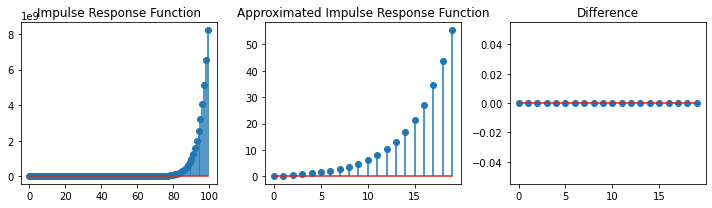

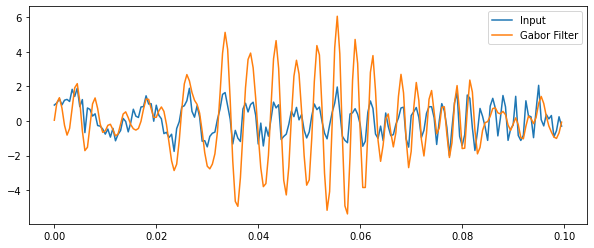

In [22]:
import numpy as np

a = [-1.265, 0.81]
b = [0.135]

# Compute the impulse response function
h = np.zeros(100)
h[0] = b[0]
for n in range(1, len(h)):
    h[n] = b[0] - a[0] * h[n-1]

# Approximate using only the first 20 values
h_approx = h[:20]

# Plot the original and approximate impulse response functions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.subplot(131)
plt.stem(h, use_line_collection=True)
plt.title('Impulse Response Function')
plt.subplot(132)
plt.stem(h_approx, use_line_collection=True)
plt.title('Approximated Impulse Response Function')
plt.subplot(133)
plt.stem(h[:20] - h_approx, use_line_collection=True)
plt.title('Difference')
plt.tight_layout()
plt.show()
from scipy.signal import chirp, convolve, gaussian

# Generate noisy sine wave
t = np.linspace(0, 0.1, 200, endpoint=False)
x = chirp(t, f0=10, f1=500, t1=0.1, method='linear') + np.random.normal(0, 0.5, len(t))

# Define Gabor function
f = 250  # Hz
sigma = 3 / (2 * np.pi * f)
t_gabor = np.arange(-3*sigma, 3*sigma, t[1] - t[0])
h_gabor = np.exp(-0.5 * (t_gabor / sigma)**2) * np.cos(2*np.pi*f*t_gabor)

# Convolve with Gabor function
y_gabor = convolve(x, h_gabor, mode='same')

# Plot results
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Input')
plt.plot(t, y_gabor, label='Gabor Filter')
plt.legend()
plt.show()


# quiz q12

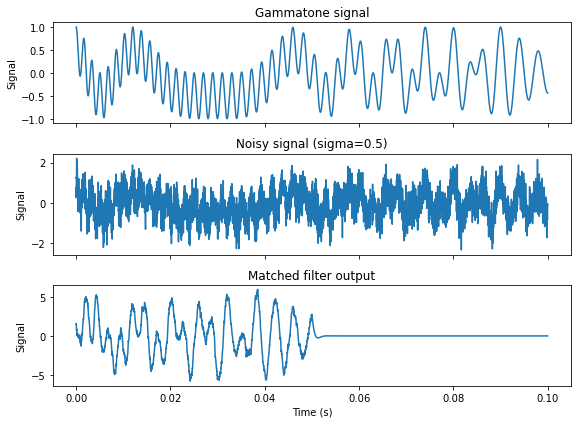

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, hilbert

# Define the signal parameters
fs = 44100  # Sampling rate (Hz)
dur = 0.1  # Duration (s)
f0 = 250  # Center frequency (Hz)

# Generate the signal
t = np.linspace(0, dur, int(fs*dur), endpoint=False)
x = chirp(t, f0=f0*np.sqrt(2), f1=f0/np.sqrt(2), t1=dur/2, method='linear') * np.cos(2*np.pi*f0*t)

# Add Gaussian noise
sigma = 0.5
noise = np.random.normal(scale=sigma, size=x.shape)
x_noisy = x + noise

# Generate the matched filter
t_filt = np.linspace(-dur/2, dur/2, int(fs*dur))
g = np.exp(-2*np.pi*f0*t_filt) * np.cos(2*np.pi*f0*t_filt)
g = g / np.sqrt(np.sum(g**2))  # Normalize the filter

# Apply the matched filter
y = np.convolve(x_noisy, g, mode='same')

# Plot the signals
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

axs[0].plot(t, x)
axs[0].set_ylabel('Signal')
axs[0].set_title('Gammatone signal')

axs[1].plot(t, x_noisy)
axs[1].set_ylabel('Signal')
axs[1].set_title('Noisy signal (sigma=0.5)')

axs[2].plot(t, y)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Signal')
axs[2].set_title('Matched filter output')

plt.tight_layout()
plt.show()

